In [1]:
import pandas as pd
import torch
import random
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as I
import torch.optim as optim
import torch.nn.functional as F

In [2]:
data = np.array(pd.read_csv('Datasets/train.csv'))
print(data.shape)
data = torch.tensor(data)

(42000, 785)


In [3]:
y = data[:,0]
x = data[:,1:]/255

In [4]:
xtrain = x[:int(0.8*len(x))]
ytrain = y[:int(0.8*len(y))]
xtest = x[int(0.8*len(x)):]
ytest = y[int(0.8*len(y)):]

train data  :  xtrain , ytrain

test data   :  xtest  , ytest

In [11]:
bat_sz = 4
n_il = 784 # no. of input criterias
n_fl = 10  # no. of neurons in the hidden layer 
n_ol = 10  # no. of neurons in the final layer

w_nl = 0.1 # weight normaliser
b_nl = 0.01 # bias normaliser

The Neural Net is defined as :
- First layer (input) : takes in 28 pixel * 28 pixel or array of 784 pixel values and writes them as neuron activations

- Second layer (hidden) : Condensing the neuron activations of the first layer neurons into 10 neurons of second layer
 
- Third layer (output) : Final layer with 10 neurons, activation of which depicts the probablity of that number

<div>
<img src="layers.png" width="300"/>
</div>

In [10]:
ix = (torch.randperm(len(xtrain)-bat_sz))
# randomising the dataset

Weights are the connections that are supposed decided by the model these connect the layers 

Biases are the additive adjustments made to the layer 

In [57]:
w1 = torch.tensor(torch.randn((n_il,n_fl))*w_nl).clone().detach().requires_grad_(True)   # Weight connecting input layer and layer one
b1 = torch.tensor(torch.randn((bat_sz,n_fl))*b_nl).clone().detach().requires_grad_(True)
w2 = torch.tensor(torch.randn((n_fl,n_ol)) * w_nl).clone().detach().requires_grad_(True)   # Weight connecting first layer and output layer
b2 = torch.tensor(torch.randn((bat_sz,n_ol)) * b_nl).clone().detach().requires_grad_(True)

C:\Users\soumi\AppData\Local\Temp\ipykernel_23960\2603008244.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w1 = torch.tensor(torch.randn((n_il,n_fl))*w_nl).clone().detach().requires_grad_(True)   # Weight connecting input layer and layer one
C:\Users\soumi\AppData\Local\Temp\ipykernel_23960\2603008244.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b1 = torch.tensor(torch.randn((bat_sz,n_fl))*b_nl).clone().detach().requires_grad_(True)
C:\Users\soumi\AppData\Local\Temp\ipykernel_23960\2603008244.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tenso

In [58]:
parame = [w1,b1,w2,b2]   # parameters to be trained
optimizer = torch.optim.SGD(parame, lr=0.01)

In [59]:
losses = []
epoch = 10

In [60]:
# Defining forward pass of the neural network (non training)

def forward(ex):
    z1 = ex.float() @ w1 + b1
    a1 = torch.sigmoid(z1)
    z2 = a1 @ w2 + b2
    a2 = torch.softmax(z2, dim=1)
    out = a2
    return out

In [61]:
for e in range(epoch):
    for i in ix:
        xt = xtrain[i:i+bat_sz]
        yt = ytrain[i:i+bat_sz]
        x_in = xt.view([bat_sz,n_il])
        y_out = F.one_hot(yt,n_ol).float()
        
        # ------------------------------------------- forward pass --------------------------------------------------------
        z1 = x_in @ w1 + b1   # w1 is multiplied by input layer neurons and b1 bias is added to the output
        a1 = torch.sigmoid(z1)   # sigmoid activation
        z2 = a1 @ w2 + b2        # n_fl, n_ol
        t = z2 

        # -----------------------------------------------------------------------------------------------------------------


        # t is the activations of the output layer (10 activations for all 4 training examples) 
        loss = F.cross_entropy(t,y_out)
        
        optimizer.zero_grad()
        loss.backward()
        # backward paopogation is simply calculating dloss/dw1 , dloss/dw2 , dloss/db1 , dloss/db2 

        optimizer.step()
        # optimiser it just adjusting the weights with the gradient above calculated
        # simply put
        # w1 = w1 - l_r*(dloss/dw1)   is the main mathematical function


        losses.append(loss)



    print("epoch :", e)
    print("loss : ", loss.item())
    
    # Testing accuracy each epoch on the test dataset
    k,d=len(xtest),len(xtest)
    for n in range(len(xtest)):
        omt =list((forward(xtest[n]))[0])
        k-=omt.index(max(omt))==ytest[n].item()
    print("Accuracy : ",((d-k)/d) *100)

epoch : 0
loss :  0.20457471907138824
Accuracy :  89.29761904761905
epoch : 1
loss :  0.11343421041965485
Accuracy :  90.76190476190476
epoch : 2
loss :  0.09013481438159943
Accuracy :  91.22619047619047
epoch : 3
loss :  0.08057047426700592
Accuracy :  91.76190476190477
epoch : 4
loss :  0.07600472122430801
Accuracy :  92.0
epoch : 5
loss :  0.07475019991397858
Accuracy :  91.98809523809524
epoch : 6
loss :  0.07500419020652771
Accuracy :  92.07142857142857
epoch : 7
loss :  0.07525043189525604
Accuracy :  91.97619047619048
epoch : 8
loss :  0.074757419526577
Accuracy :  92.19047619047619
epoch : 9
loss :  0.07333246618509293
Accuracy :  92.28571428571428


Lets Draw and check

In [95]:
# lets check its accuracy on the inputs it has never encountered
k,d=len(xtest),len(xtest)
for n in range(len(xtest)):
    omt =list((forward(xtest[n]))[0])
    k-=omt.index(max(omt))==ytest[n].item()
print("Accuracy : ",((d-k)/d) *100)

Accuracy :  92.28571428571428


this is ur image 


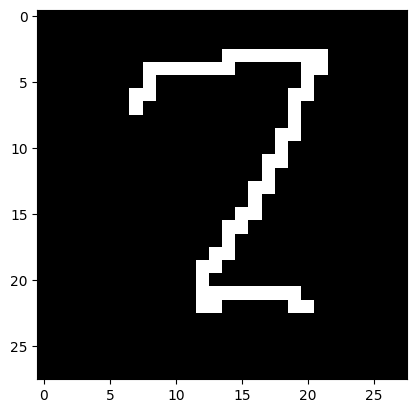

In [93]:
im = I.open('checker.png')
pixels = im.load()
arr = []
for k in range(28):
    for l in range(28):
        arr.append(pixels[l,k][0])
tarr = torch.tensor(arr)   #x[204])#
parr = tarr.reshape([28,28])
print('this is ur image ')
plt.gray()
plt.imshow(parr, interpolation='nearest')
plt.show()

In [94]:
oot =list((forward(tarr))[0])
print('my prediction is : ',oot.index(max(oot)))

my prediction is :  2
